In [10]:
import numpy as np 
import pandas as pd 

In [11]:
data=pd.read_csv('dataset.csv')
data.head()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Target
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,0
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,0
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,0
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,0
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [12]:
from sklearn.model_selection import train_test_split
X = data.copy()

y = X.pop('Target')

X = data.drop(columns=['index','Target'])

X_train, X_valid, y_train, y_valid = \
    train_test_split(X, y, stratify=y, train_size=0.75)

input_shape = [X_train.shape[1]]
print("Input shape is ", input_shape)
X.head()

Input shape is  [30]


,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,1,-1,-1,-1,-1,1,1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,1,-1,-1,0,-1,1,1,1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,1,-1,1,-1,1,0,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,1,-1,-1,1,-1,1,-1,1
4,1,0,-1,1,1,-1,1,1,-1,1,...,1,-1,1,-1,-1,0,-1,1,1,1


In [13]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid'),
])

In [14]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy',keras.metrics.Precision(),keras.metrics.Recall()],
    
)

In [15]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=20,
    min_delta=0.01,
    restore_best_weights=True,
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=200,
    callbacks=[early_stopping],
)

Epoch 1/200
17/17 [==============================] - 2s 40ms/step - loss: 0.2906 - binary_accuracy: 0.8841 - precision_1: 0.9115 - recall_1: 0.8770 - val_loss: 0.3569 - val_binary_accuracy: 0.8933 - val_precision_1: 0.8471 - val_recall_1: 0.9864
Epoch 2/200
17/17 [==============================] - 0s 23ms/step - loss: 0.1703 - binary_accuracy: 0.9328 - precision_1: 0.9321 - recall_1: 0.9485 - val_loss: 0.3623 - val_binary_accuracy: 0.8755 - val_precision_1: 0.8211 - val_recall_1: 0.9929
Epoch 3/200
17/17 [==============================] - 0s 26ms/step - loss: 0.1455 - binary_accuracy: 0.9397 - precision_1: 0.9409 - recall_1: 0.9515 - val_loss: 0.3375 - val_binary_accuracy: 0.8868 - val_precision_1: 0.8383 - val_recall_1: 0.9870
Epoch 4/200
17/17 [==============================] - 0s 26ms/step - loss: 0.1332 - binary_accuracy: 0.9454 - precision_1: 0.9439 - recall_1: 0.9589 - val_loss: 0.3154 - val_binary_accuracy: 0.8936 - val_precision_1: 0.8480 - val_recall_1: 0.9857
Epoch 5/200
17/1

# Evaluation Metrics

<Axes: >

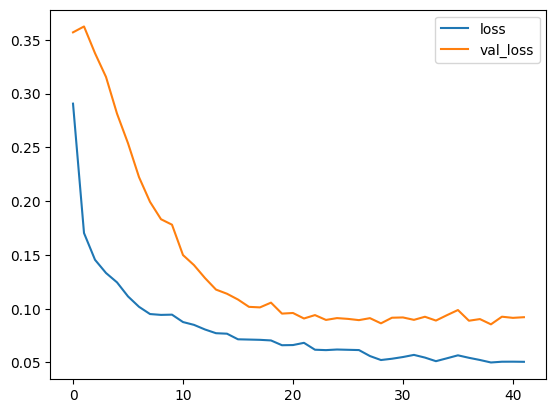

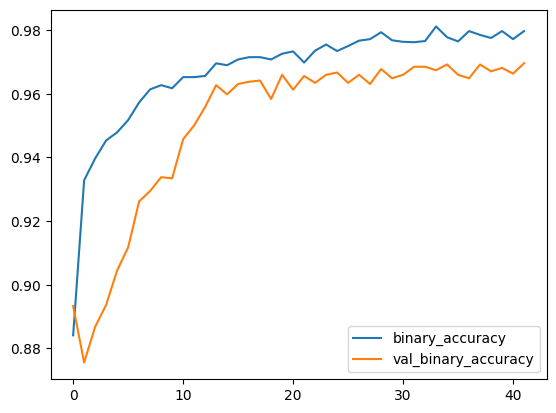

In [16]:
history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()
history_df.loc[0:, ['binary_accuracy', 'val_binary_accuracy']].plot()


In [17]:
print(f"Best Validation Loss: {history_df['val_loss'].min()}" +\
      f"\nBest Validation Accuracy: {history_df['val_binary_accuracy'].max()}"
)

Best Validation Loss: 0.0854736939072609
Best Validation Accuracy: 0.969609260559082
